
# PROYECTO DETECCIÓN DE ARMAS DE FUEGO EN SECUENCIAS DE VIDEO
---
Integrantes:


*   Juan David Marín
*   Mateo Ortiz Cruzate


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Librerìas necesarias
import zipfile
import os
from PIL import Image
import glob
from google.colab import files
from IPython.display import Image
import numpy as np

## Extrayendo los .zips (no correr de nuevo)

In [ ]:
# Ruta del archivo comprimido del dataset
dataset_zip_path = '/content/drive/MyDrive/Ing. Sistemas/Inteligencia Artificial/IA2/Proyecto/YouTube-GDD.zip'
# Extraer el contenido en la carpeta de dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Ing. Sistemas/Inteligencia Artificial/IA2/Proyecto/dataset')


In [ ]:
# Ruta del archivo comprimido de labels
labels_zip_path = '/content/drive/MyDrive/Ing. Sistemas/Inteligencia Artificial/IA2/Proyecto/YouTube-GDD_test_labels.zip'
# Extraer el contenido en la carpeta de labels
with zipfile.ZipFile(labels_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Ing. Sistemas/Inteligencia Artificial/IA2/Proyecto/labels')


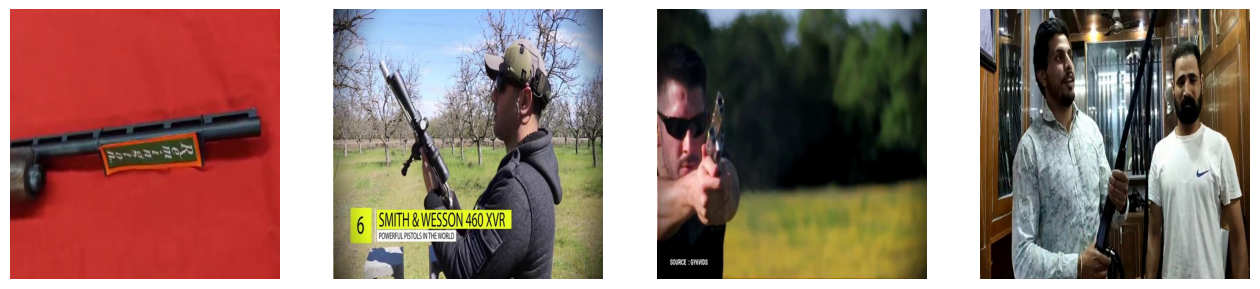

In [ ]:
# Some plots
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def plot_multple_examples(cohort:'str', normalized:bool):
  # plot multiple images
  def plot_images(image_paths):
      fig, axes = plt.subplots(1, 4, figsize=(16, 4))

      for ax, image_path in zip(axes, image_paths):
          img = Image.open(image_path)
          img_array = np.array(img)
          ax.imshow(img_array)
          ax.axis('off')

      plt.show()
  if normalized == False:
    folder = '/content/drive/MyDrive/Ing. Sistemas/Inteligencia Artificial/IA2/Proyecto/dataset/images/'
  else:
    folder = '/content/drive/MyDrive/Ing. Sistemas/Inteligencia Artificial/IA2/Proyecto/dataset/images/normalized/'

  if cohort == 'test':
    folder = folder + 'test/'
  elif cohort == 'train':
    folder = folder + 'train/'
  elif cohort == 'val':
    folder = folder + 'val/'



  test_image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg')]
  # print(len(test_image_files))
  # print(folder)
  random_images = random.sample(test_image_files, 4)

  plot_images(random_images)

plot_multple_examples('test', False)



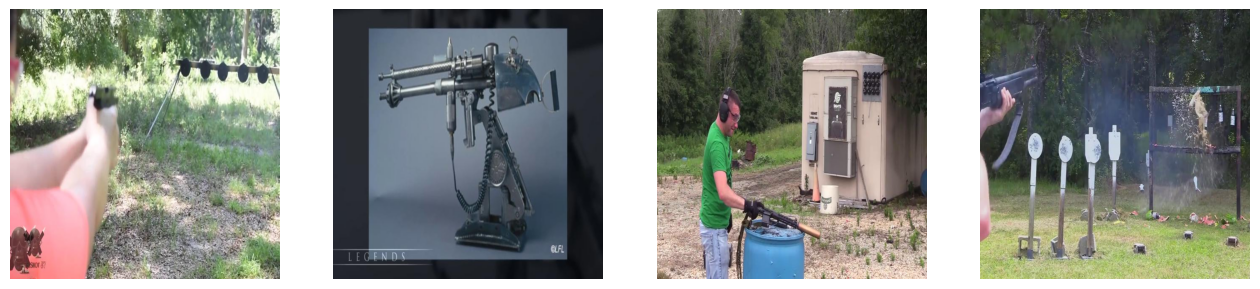

In [ ]:
# Some plots
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def plot_multple_examples(cohort:'str', normalized:bool):
  # plot multiple images
  def plot_images(image_paths):
      fig, axes = plt.subplots(1, 4, figsize=(16, 4))

      for ax, image_path in zip(axes, image_paths):
          img = Image.open(image_path)
          img_array = np.array(img)
          ax.imshow(img_array)
          ax.axis('off')

      plt.show()
  if normalized == False:
    folder = '/content/drive/MyDrive/IA2/Proyecto/dataset/images/'
  else:
    folder = '/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/'

  if cohort == 'test':
    folder = folder + 'test/'
  elif cohort == 'train':
    folder = folder + 'train/'
  elif cohort == 'val':
    folder = folder + 'val/'



  test_image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.jpg')]
  # print(len(test_image_files))
  # print(folder)
  random_images = random.sample(test_image_files, 4)

  plot_images(random_images)

plot_multple_examples('test', False)



## Redimensionando las imagenes (No correr de nuevo)

In [ ]:
from PIL import Image
import numpy as np
import glob

def normalization(image):
    img_array = np.array(image, dtype=np.float32)
    img_normalized = img_array / 255.0 # RGB
    return Image.fromarray((img_normalized * 255).astype(np.uint8))

def resize_and_normalize_images(path, size=(640, 640)):
    for image_path in glob.glob(f"{path}/*.jpg"):
        img = Image.open(image_path)
        img = img.resize(size)
        img = normalization(img)
        img.save(image_path)

# Apply resizing and normalization to train, val, and test
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/train')
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/val')
resize_and_normalize_images('/content/drive/MyDrive/IA2/Proyecto/dataset/images/normalized/test')



Verificando Preprocesamiento

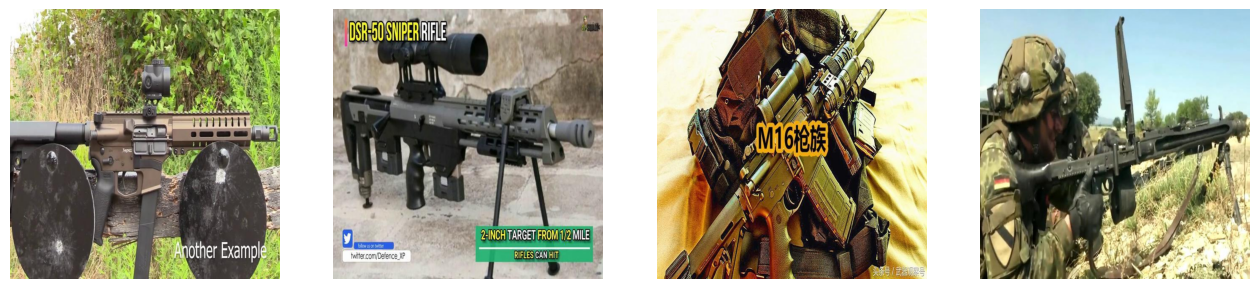

In [ ]:
plot_multple_examples('val', True) # val cohort and normalized images

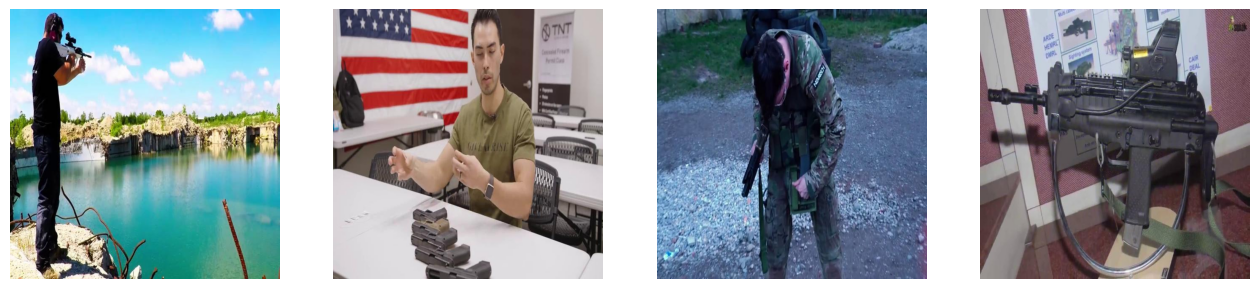

In [ ]:
plot_multple_examples('val', True) # val cohort and normalized images

# Instalando YOLOv5

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-379-gd4e4c351 Python-3.10.12 torch-2.5.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/107.7 GB disk)


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


## Archivo .yaml necesario

In [4]:
dataset_yaml = """
path: /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/
train: images/train
val: images/val
test: images/test
nc: 2
names: ['person', 'gun']
"""
with open("/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml", "w") as file:
    file.write(dataset_yaml)


In [ ]:
dataset_yaml = """
path: /content/drive/MyDrive/IA2/Proyecto/dataset
train: images/train
val: images/val
test: images/test
nc: 2
names: ['person', 'gun']
"""
with open("/content/drive/MyDrive/IA2/Proyecto/dataset/dataset.yaml", "w") as file:
    file.write(dataset_yaml)


## Yolo siuuu

In [ ]:
!python train.py --img 640 --batch 16 --epochs 20 --data /content/drive/MyDrive/IA2/Proyecto/dataset/dataset.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
      10/19       4.4G    0.03536      0.027   0.005208         63        640:  41%|████      | 102/250 [00:36<00:43,  3.41it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/19       4.4G    0.03538    0.02704   0.005188         85        640:  41%|████      | 103/250 [00:36<00:41,  3.50it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/19       4.4G    0.03542    0.02713   0.005185        124        640:  42%|████▏     | 104/250 [00:37<00:45,  3.23it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(a

# Pasemos de 20 a 50 epochs y aumentaremos el batch size

In [ ]:
!python train.py --img 640 --batch 32 --epochs 50 --data /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
      19/49      8.59G    0.03211    0.02555   0.004284        174        640:  94%|█████████▎| 117/125 [01:14<00:04,  1.93it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      19/49      8.59G    0.03207    0.02557   0.004272        160        640:  94%|█████████▍| 118/125 [01:15<00:03,  1.91it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      19/49      8.59G    0.03211    0.02557   0.004273        162        640:  95%|█████████▌| 119/125 [01:15<00:03,  1.99it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(a

# Validación

In [ ]:
!python val.py --data /content/drive/MyDrive/IA2/Proyecto/dataset/dataset.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --imgsz 640


val: data=/content/drive/MyDrive/IA2/Proyecto/dataset/dataset.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1PKQmJ2X983NloTIs33rjQXp05Cm9I-MF/Proyecto/dataset/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100% 500/500 [00:07<00:00, 65.46it/s]
val: New cache created: /content/drive/.shortcut-targets-by-id/1PKQmJ2X983NloTIs33rjQXp05Cm9I-MF/Proyecto/dataset/labels/val.cache
                 Class     Images  Instances          P          R      mAP50   mA

# Segundo Experimento

In [ ]:
!python val.py --data /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --imgsz 640


val: data=/content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/dataset.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-379-gd4e4c351 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Ing_Sistemas/Inteligencia_Artificial/IA2/Proyecto/dataset/labels/val.cache... 500 images, 0 backgrounds, 0 corrupt: 100% 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 16/16 [00:13<00:00,  1.19it/s]
                   all        500       1133      0.881      

<p align="center">
    <img src="https://drive.google.com/uc?id=1NONjEOsUawFP5nESsD5cRvy01GyLJinp" width="800">
</p>
